### Author: Eddieb Sadat  
### Date: July 8 2025  
### Dataset: [Cybersecurity 🪪 Intrusion 🦠 Detection Dataset](https://www.kaggle.com/datasets/dnkumars/cybersecurity-intrusion-detection-dataset/data)  
### Objective: Develop a model to accurately identify malicious network activity.  
### Methods:

# Importing libraries and loading Dataframe

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('cybersecurity_intrusion_data.csv')

plt.style.use('seaborn-v0_8-muted')
# plt.style.use('fivethirtyeight')

# Data discovery  
Understanding the structure and contents of the data.

In [2]:
df.head() # Print first 5 rows of dataframe

,session_id,network_packet_size,protocol_type,login_attempts,session_duration,encryption_used,ip_reputation_score,failed_logins,browser_type,unusual_time_access,attack_detected
0,SID_00001,599,TCP,4,492.983263,DES,0.606818,1,Edge,0,1
1,SID_00002,472,TCP,3,1557.996461,DES,0.301569,0,Firefox,0,0
2,SID_00003,629,TCP,3,75.044262,DES,0.739164,2,Chrome,0,1
3,SID_00004,804,UDP,4,601.248835,DES,0.123267,0,Unknown,0,1
4,SID_00005,453,TCP,5,532.540888,AES,0.054874,1,Firefox,0,0


In [3]:
df.describe() # Print basic statistics of quantatative columns

,network_packet_size,login_attempts,session_duration,ip_reputation_score,failed_logins,unusual_time_access,attack_detected
count,9537.000000,9537.000000,9537.000000,9537.000000,9537.000000,9537.000000,9537.000000
mean,500.430639,4.032086,792.745312,0.331338,1.517773,0.149942,0.447101
std,198.379364,1.963012,786.560144,0.177175,1.033988,0.357034,0.497220
min,64.000000,1.000000,0.500000,0.002497,0.000000,0.000000,0.000000
25%,365.000000,3.000000,231.953006,0.191946,1.000000,0.000000,0.000000
50%,499.000000,4.000000,556.277457,0.314778,1.000000,0.000000,0.000000
75%,635.000000,5.000000,1105.380602,0.453388,2.000000,0.000000,1.000000
max,1285.000000,13.000000,7190.392213,0.924299,5.000000,1.000000,1.000000


In [4]:
df.count() # Count of non-null rows per column

session_id             9537
network_packet_size    9537
protocol_type          9537
login_attempts         9537
session_duration       9537
encryption_used        7571
ip_reputation_score    9537
failed_logins          9537
browser_type           9537
unusual_time_access    9537
attack_detected        9537
dtype: int64

Visualize missing rows per column

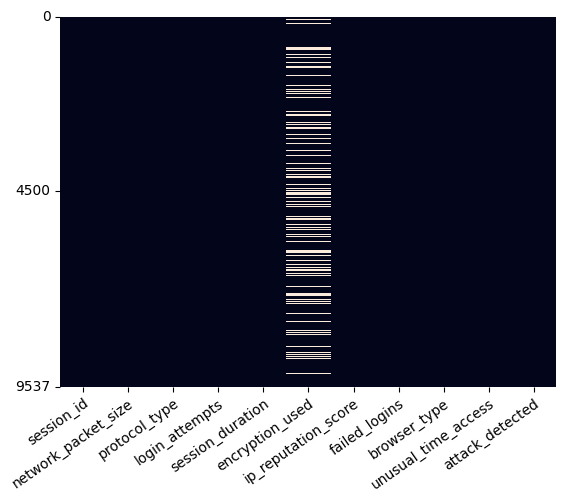

In [5]:
sns.heatmap(df.isnull(), cbar=False) # Visualize missing rows per column
plt.xticks(rotation=35, ha='right', rotation_mode='anchor')
plt.yticks([0, 4500, len(df)], labels=[0, 4500, len(df)])
plt.show()

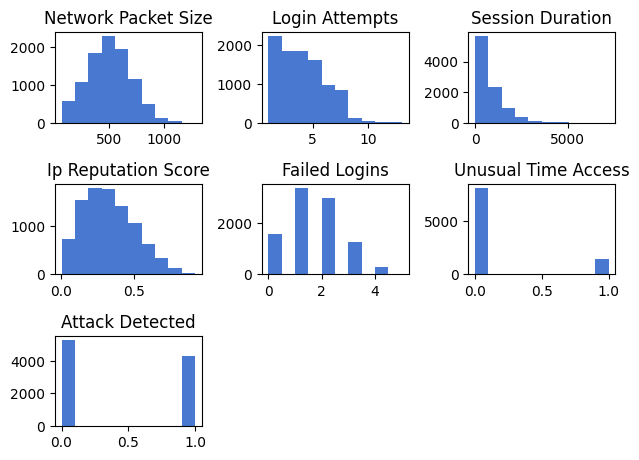

In [6]:
ax = df.hist(grid=False)
for i in ax:
    for x in i:
        if x.get_title() != '':
            x.set_title(' '.join([i.capitalize() for i in x.get_title().split('_')]))

plt.tight_layout(rect=[0, 0, 1, 0.98]) # Adjust layout to prevent title overlap
plt.show()

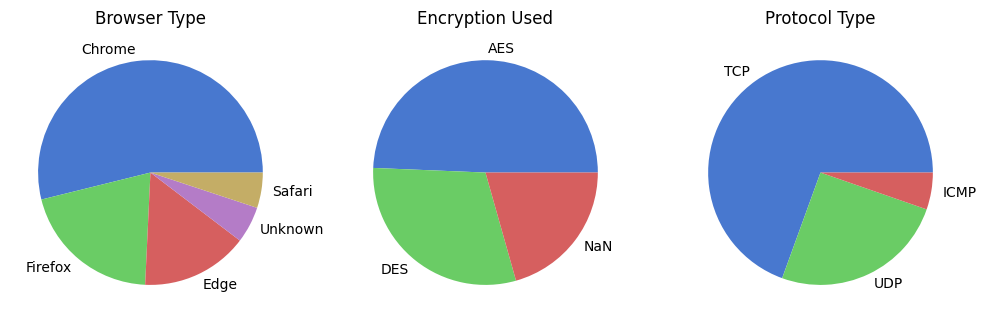

In [7]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 8))

axes[0].pie(df.browser_type.value_counts(), labels=df.browser_type.value_counts().index)
axes[0].set_title('Browser Type')


enc = df.encryption_used.value_counts()
enc['NaN']=len(df[df.encryption_used.isna()])

axes[1].pie(enc, labels=enc.index)
axes[1].set_title('Encryption Used')


axes[2].pie(df.protocol_type.value_counts(), labels=df.protocol_type.value_counts().index)
axes[2].set_title('Protocol Type')



plt.tight_layout()
plt.show()
# df.browser_type.value_counts().index

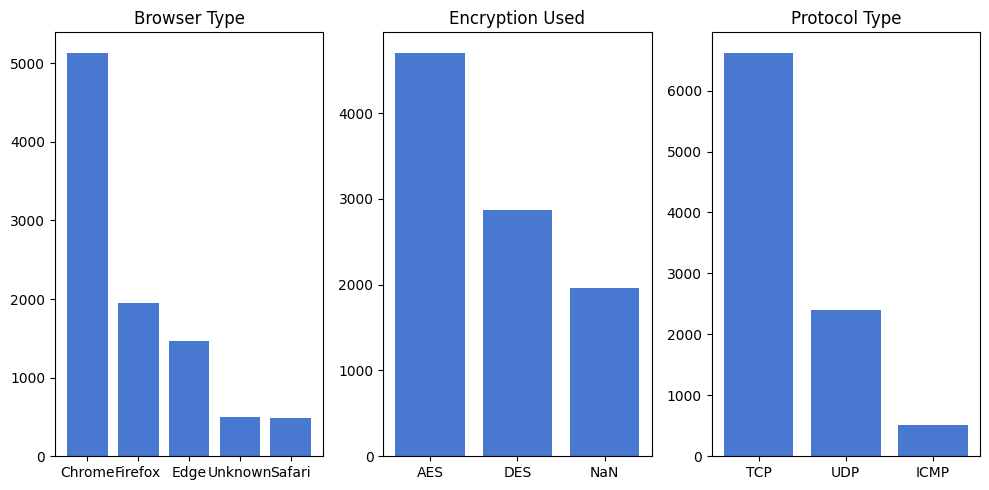

In [8]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 5))

axes[0].bar(x=df.browser_type.value_counts().index, height=df.browser_type.value_counts())
axes[0].set_title('Browser Type')


enc = df.encryption_used.value_counts()
enc['NaN']=len(df[df.encryption_used.isna()])

axes[1].bar(x=enc.index, height=enc)
axes[1].set_title('Encryption Used')


axes[2].bar(x=df.protocol_type.value_counts().index, height=df.protocol_type.value_counts())
axes[2].set_title('Protocol Type')



plt.tight_layout()
plt.show()

In [ ]:
sns.heatmap(df.drop(['session_id','browser_type', 'encryption_used', 'protocol_type'], axis=1).corr())
print(df.drop(['session_id','browser_type', 'encryption_used', 'protocol_type'], axis=1).corr())

(array([1, 2, 3, 4, 5, 6, 7]),
 [Text(1, 0, 'network_packet_size'),
  Text(2, 0, 'login_attempts'),
  Text(3, 0, 'session_duration'),
  Text(4, 0, 'ip_reputation_score'),
  Text(5, 0, 'failed_logins'),
  Text(6, 0, 'unusual_time_access'),
  Text(7, 0, 'attack_detected')])

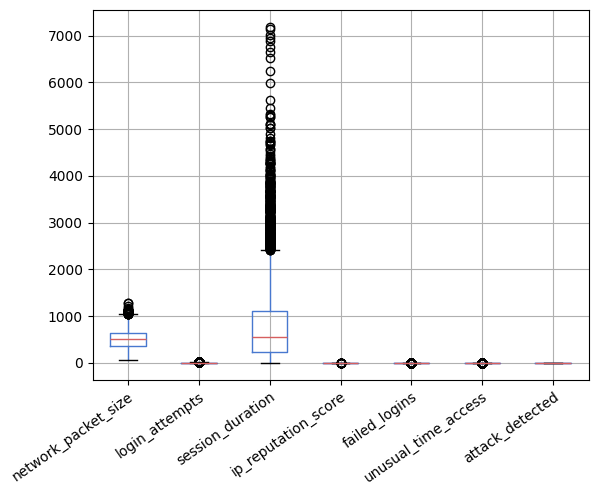

In [12]:
# df.boxplot(column=['failed_logins','login_attempts'])
df_browser = df.drop(columns=['session_id', 'encryption_used', 'protocol_type'])
df_browser.boxplot(column=['network_packet_size','login_attempts','session_duration','ip_reputation_score','failed_logins','unusual_time_access','attack_detected'])
plt.xticks(rotation=35, ha='right', rotation_mode='anchor')
# plt.boxplot(data=df.failed_logins, x=df.browser_type)

NOTES:  
- Consider One-hot encoding for the categorical data.
- Need to figure out how to show distribution of non-num data (Bar? Pie?)